Question:   quelles variables sont utilisees en premier pour decider de l'approbation d'un prêt?

In [1]:
import pandas as pd

# Lire les données depuis le fichier Excel
file_path = 'train (2).xlsx'
df = pd.read_excel(file_path)

# Afficher les premières lignes du dataframe pour vérifier le chargement des données
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0         128               360   
1             3000                0.0          66               360   
2             2583             2358.0         120               360   
3             6000                0.0         141               360   
4             5417             4196.0         267               360   

   Credit_History Property_Area Loan_Status  
0               1         Rural           N  
1               1         Urban           Y  
2               1   

In [2]:
from sklearn.preprocessing import LabelEncoder

# Remplacer les valeurs manquantes, s'il y en a
df.fillna(method='ffill', inplace=True)

# Encoder les variables catégorielles
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

# Séparer les caractéristiques et la variable cible
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']


In [3]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Créer et entraîner le modèle de l'arbre de décision
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

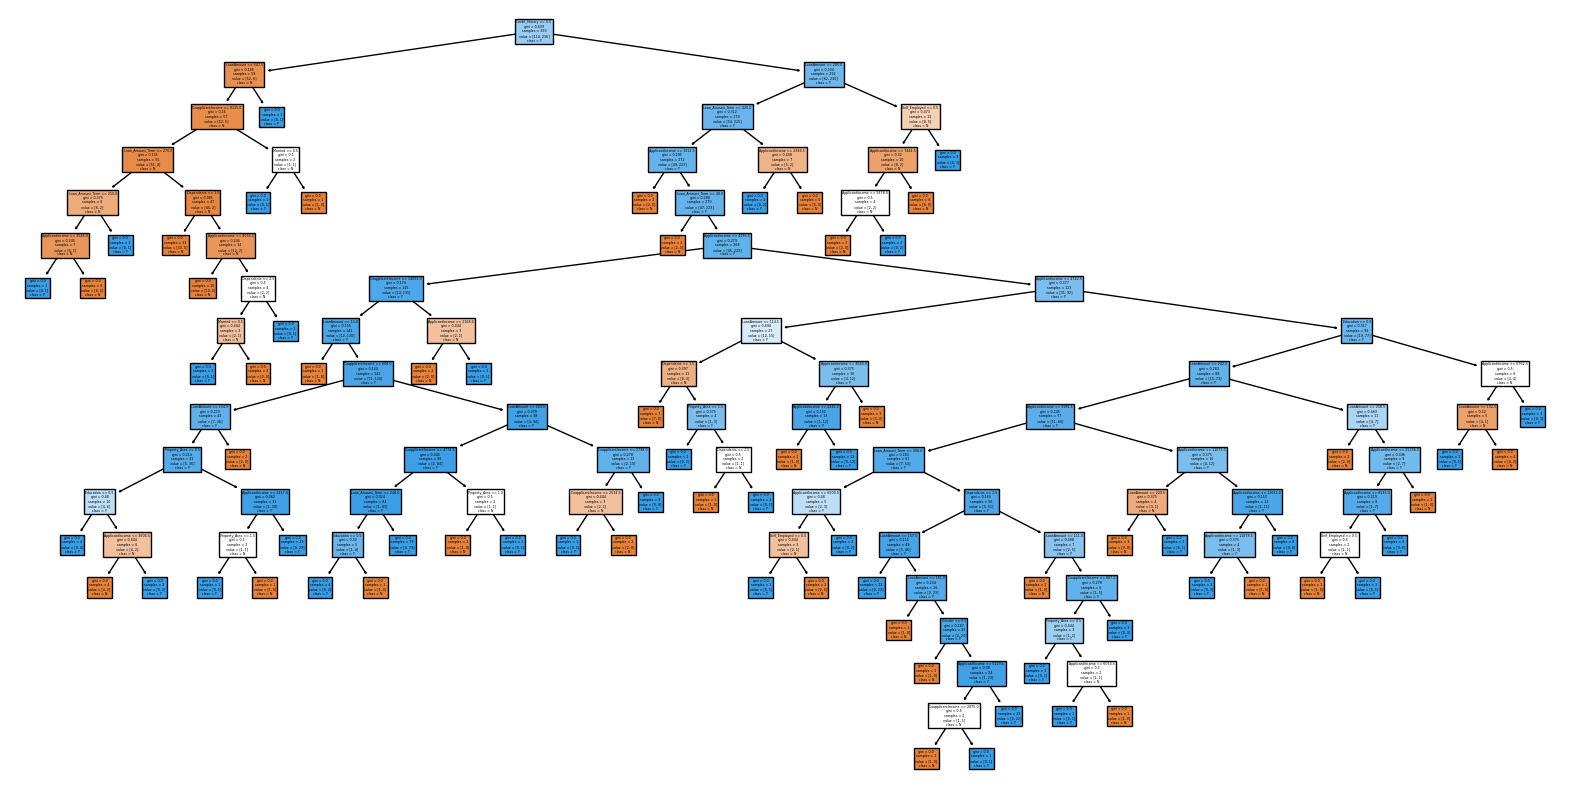

Credit_History       0.294706
ApplicantIncome      0.267217
LoanAmount           0.151226
Loan_Amount_Term     0.063613
CoapplicantIncome    0.059730
Dependents           0.036093
Education            0.034644
Self_Employed        0.034391
Property_Area        0.031732
Married              0.015177
Gender               0.011470
dtype: float64


In [5]:
# Visualiser l'arbre de décision
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['N', 'Y'], filled=True)
plt.show()

# Afficher l'importance des caractéristiques
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


Interprétation
Les trois caractéristiques les plus importantes sont Credit_History, ApplicantIncome, et LoanAmount. Cela signifie que l'historique de crédit du demandeur, son revenu principal, et le montant du prêt demandé sont les premiers critères utilisés par l'arbre de décision pour déterminer si un prêt sera approuvé ou non car il ayont les valeur les plus haut parmi les outres  variable .